# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data files will be in the canvas assignment, merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.



In [3]:
# import needed libraries for the project
import pandas as pd 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [4]:
# load data from the salary dataset
salary_data = pd.read_csv("2025_salaries.csv", header=1, encoding ='latin-1') # header=1 means that the first row of the data will be treated as the column names
# the issue here is that the column names are unamed because it's counting the columns names as the first ROW
# Meaning the first row of the data is being treated as the column names, which is why the columns are labeled as "Unnamed: 0", "Unnamed: 1"...
salary_data.head()

,Player,Tm,2025-26
0,Jaden Springer,NOP,"$70,732"
1,Garrison Mathews,IND,"$131,970"
2,Garrison Mathews,IND,"$131,970"
3,Mac McClung,IND,"$164,060"
4,Didi Louzada,POR,"$268,032"


In [5]:
# load data from the nba stats dataset
stats = pd.read_csv("nba_2025.txt", sep=",", encoding='latin-1') # sep=',' means that the data is separated by commas, which is the default for csv files, but since this is a txt file we need to specify it; encoding='latin-1' is used to specify the encoding of the file, which is necessary because there are characters in the file that fall outside of the default 'utf-8' encoding, which is why we need to use 'latin-1' to properly read the file without errors.
stats.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,1.0,Shai Gilgeous-Alexander,27.0,OKC,PG,49.0,49.0,1632.0,534.0,964.0,...,218.0,314.0,64.0,38.0,103.0,101.0,1558.0,0.0,NaN,gilgesh01
1,2.0,Tyrese Maxey,25.0,PHI,PG,52.0,52.0,2008.0,524.0,1117.0,...,214.0,351.0,102.0,40.0,126.0,118.0,1503.0,0.0,NaN,maxeyty01
2,3.0,Donovan Mitchell,29.0,CLE,SG,51.0,51.0,1719.0,516.0,1060.0,...,229.0,302.0,79.0,15.0,159.0,125.0,1478.0,0.0,NaN,mitchdo01
3,4.0,Jaylen Brown,29.0,BOS,SF,49.0,49.0,1676.0,534.0,1105.0,...,336.0,229.0,49.0,20.0,176.0,136.0,1435.0,2.0,NaN,brownja02
4,5.0,Luka DonÄiÄ,26.0,LAL,PG,42.0,42.0,1492.0,437.0,923.0,...,329.0,360.0,61.0,19.0,179.0,102.0,1379.0,6.0,NaN,doncilu01


In [6]:
# inner join --our players...like the spine of the books 
# merge the two dataframes on the "Player" columns
merged_data = pd.merge(salary_data, stats, on="Player") 
#our key is PLAYER
# syntax --makes everything lowercase so the merge is easy

In [7]:
merged_data.shape
merged_data.head()

,Player,Tm,2025-26,Rk,Age,Team,Pos,G,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,Garrison Mathews,IND,"$131,970",398.0,29.0,IND,SG,15.0,1.0,196.0,...,17.0,10.0,6.0,3.0,3.0,19.0,78.0,0.0,NaN,mathega01
1,Garrison Mathews,IND,"$131,970",398.0,29.0,IND,SG,15.0,1.0,196.0,...,17.0,10.0,6.0,3.0,3.0,19.0,78.0,0.0,NaN,mathega01
2,Mac McClung,IND,"$164,060",459.0,27.0,2TM,SG,4.0,0.0,47.0,...,5.0,2.0,5.0,2.0,3.0,8.0,23.0,0.0,NaN,mccluma01
3,Mac McClung,IND,"$164,060",459.0,27.0,IND,SG,3.0,0.0,34.0,...,4.0,1.0,5.0,1.0,2.0,6.0,19.0,0.0,NaN,mccluma01
4,Mac McClung,IND,"$164,060",459.0,27.0,CHI,SG,1.0,0.0,13.0,...,1.0,1.0,0.0,1.0,1.0,2.0,4.0,0.0,NaN,mccluma01


In [8]:
# check for duplicates in the merged data
merged_data["Player"].value_counts().head()

Player
Jock Landale              6
Jeremiah Robinson-Earl    6
Mac McClung               3
Isaac Jones               3
Leonard Miller            3
Name: count, dtype: int64

In [9]:
#Drop variables that will not be needed or are duplicates
duplicates = merged_data[merged_data.duplicated(subset="Player", keep=False)]
# when we see one pair of brakcets it means we're not necesseraily indexing but rather we are trying to subset the existing dataset and pass it back onto a new variable
# if two brackets we'd be slicing the data frame and getting a specific row or column
print(duplicates)
# checked in data wrangler and there's only 56 unique entries the rest are duplicates

                     Player   Tm    2025-26     Rk   Age Team Pos     G   GS  \
0          Garrison Mathews  IND  $131,970   398.0  29.0  IND  SG  15.0  1.0   
1          Garrison Mathews  IND  $131,970   398.0  29.0  IND  SG  15.0  1.0   
2               Mac McClung  IND  $164,060   459.0  27.0  2TM  SG   4.0  0.0   
3               Mac McClung  IND  $164,060   459.0  27.0  IND  SG   3.0  0.0   
4               Mac McClung  IND  $164,060   459.0  27.0  CHI  SG   1.0  0.0   
..                      ...  ...        ...    ...   ...  ...  ..   ...  ...   
518  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  IND  PF  17.0  3.0   
519  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  DAL  PF   5.0  0.0   
520  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  2TM  PF  22.0  3.0   
521  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  IND  PF  17.0  3.0   
522  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  DAL  PF   5.0  0.0   

        MP  ...    TRB   AST  STL  BLK 

In [10]:
# PROBLEM: after merging some players appear twice because they played for multiple teams, they have seperate rows for each team and they have 2TM row which is their full season total
# want to keep the 2TM row and drop the other rows for when they played at a different team

# So we do this: 
merged_data = (
    merged_data
    # create a temporary column called "Has_2TM" that checks if the "Team" column is equal to "2TM"
    .assign(Has_2TM = merged_data["Team"].eq("2TM"))

    # this sorts the data by "Player" alphabetically and then by "Has_2TM" in descending order, so that the rows with "Has_2TM" equal to True (i.e. the 2TM rows) come first for each player
    .sort_values(["Player", "Has_2TM"], ascending=[True, False])

    # this drops the duplicate rows for each player, keeping only the first row (which is the 2TM row if it exists)
    .drop_duplicates("Player", keep="first")

    # this drops the temporary "Has_2TM" column, since we no longer need it
    .drop(columns="Has_2TM")

    # this makes a clean copy of the dataframe., which is a good practice to avoid potential issues with chained indexing
    .copy()
)

In [11]:
#re-checking the merged data after dropping duplicates
merged_data.head()

,Player,Tm,2025-26,Rk,Age,Team,Pos,G,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
112,A.J. Green,MIL,"$2,301,587",142.0,26.0,MIL,SG,49.0,49.0,1480.0,...,128.0,99.0,27.0,5.0,41.0,115.0,522.0,0.0,NaN,greenaj01
154,AJ Johnson,DAL,"$3,090,480",404.0,21.0,2TM,SG,28.0,0.0,225.0,...,32.0,23.0,7.0,0.0,18.0,15.0,70.0,0.0,NaN,johnsaj01
424,Aaron Gordon,DEN,"$22,841,455",193.0,30.0,DEN,PF,23.0,20.0,642.0,...,142.0,58.0,16.0,4.0,24.0,38.0,406.0,0.0,NaN,gordoaa01
80,Aaron Holiday,HOU,"$2,296,274",304.0,29.0,HOU,PG,35.0,1.0,465.0,...,30.0,34.0,16.0,4.0,21.0,47.0,200.0,0.0,NaN,holidaa01
345,Aaron Nesmith,IND,"$11,000,000",174.0,26.0,IND,SF,32.0,29.0,977.0,...,152.0,68.0,21.0,18.0,46.0,86.0,434.0,0.0,NaN,nesmiaa01


In [12]:
# View the column names to determine which variables to keep for clustering 
print(merged_data.columns)

Index(['Player', 'Tm', '2025-26', 'Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Trp-Dbl', 'Awards', 'Player-additional'],
      dtype='str')


In [13]:
# drop columns that are not needed for the analysis
# Goal: Cluster players based on PERFORMANCE, then compare SALARY across clusters
# do NOT include Salary in the clustering features
# Salary will be analyzed AFTER clustering to estimate under/over-paid players

# RENAME the salary column because it is currently named "2025-26". Renaming makes the notebook easier to read.
merged_data = merged_data.rename(columns={"2025-26": "Salary"})

# drop indetifier columns, team codes,etc. that are not needed for clustering
# These columns do not represent basketball skill or performance similarity.

cols_to_drop = [
    "Tm",                  # team code from salary file
    "Team",                # team code from stats file
    "Rk",                  # ranking index from source table
    "Awards",              # mostly missing values
    "Player-additional",   # website ID
    "Trp-Dbl"              # rare event stat
]

merged_data = merged_data.drop(columns=cols_to_drop)

In [14]:
# then I'm thinking of dropping the count columns like FG, FGA, 3P, 3PA, 2P, 2PA, FT and FTA because we already have it as percentages
# which I think are more useful for clustering so I will keep the percetange columns 

redundant_cols = [
    "FG", "FGA",
    "3P", "3PA",
    "2P", "2PA",
    "2P%",
    "FT", "FTA",
    "ORB", "DRB",
    "TOV", "PF"
] 

merged_data = merged_data.drop(columns=redundant_cols)

In [15]:
# now check what columns are left in the merged data after dropping the unneeded columns
print(merged_data.columns)

Index(['Player', 'Salary', 'Age', 'Pos', 'G', 'GS', 'MP', 'FG%', '3P%', 'eFG%',
       'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS'],
      dtype='str')


In [16]:
# now we can cluster players based on their performance stats and then compare their salaries
# salary and player are excluded from clustering!

features = [
    "PTS",     # total points scored (offensive production)
    "AST",     # assists (playmaking ability)
    "TRB",     # total rebounds (inside presence / hustle)
    "STL",     # steals (perimeter defense)
    "BLK",     # blocks (rim protection)
    "MP",      # minutes played (role size / usage)
    "eFG%",    # effective field goal percentage (true shooting efficiency)
    "FT%"      # free throw percentage (shooting consistency)
]
# Select only those columns from the full dataset
X = merged_data[features]

In [17]:
# then we handle missing values 
# KMeans cannot work with missing value so if any player has a missing value in these features 
# so we check for missing values in the features we are using for clustering
missing_counts = merged_data[features].isnull().sum()

print("Missing values per feature:")
print(missing_counts)

# from here we see that Only 3 players in the entire dataset are missing FT%.
# That likely means: They attempted 0 free throws So FT% was undefined which could mean they didn't get much playing time 

Missing values per feature:
PTS     0
AST     0
TRB     0
STL     0
BLK     0
MP      0
eFG%    0
FT%     3
dtype: int64


In [18]:
# From here I'm thinking of dropping the 3 players with missing FT% because they are likely players who didn't get much playing time and their stats are not representing their skill level.
# and since it's a very small number of players, it won't affect the overall clustering results.

X = merged_data[features].dropna()  # drop rows with missing values in the selected features
print("Number of players used for clustering:", X.shape[0])
# so there are 411 players used for clustering after dropping the 3 players with missing FT%

Number of players used for clustering: 411


In [19]:
# next I will scale the data using StandardScaler from sklearn.preprocessing. 
# This will standardize the features so they are all under the same scale
# standardscaler transforms each feature so mean = 0 and standard deviation = 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # fit the scaler to the data and transform it

print("Scaled data shape:", X_scaled.shape)


Scaled data shape: (411, 8)


In [20]:
#Run the clustering algo with your best guess for K

# I was thinking that in the nba there are 4 groups: superstars like Lebron, high-level stars like anthony davis, then solid players and lastly bench players. 
# As such I was thinking of using K=4 for the clustering algorithm.

from sklearn.cluster import KMeans

k = 4  # number of clusters

kmeans = KMeans(n_clusters=k, random_state=42)  # create a KMeans instance with k clusters

#fit the model to the scaled data
kmeans.fit(X_scaled)  

#get cluster labels for each player
labels = kmeans.labels_


In [21]:
# ATTACH CLUSTER LABELS BACK TO PLAYERS
# X.index corresponds to the rows used for clustering.
# We use that index to align cluster labels with the original data.

clustered_data = merged_data.loc[X.index].copy()
clustered_data["Cluster"] = labels

# View first few results
clustered_data[["Player", "Cluster", "Salary"]].head()

,Player,Cluster,Salary
112,A.J. Green,3,"$2,301,587"
154,AJ Johnson,0,"$3,090,480"
424,Aaron Gordon,3,"$22,841,455"
80,Aaron Holiday,3,"$2,296,274"
345,Aaron Nesmith,3,"$11,000,000"


In [22]:
# VIEW CLUSTER SIZES
clustered_data["Cluster"].value_counts()

Cluster
3    168
2    114
0     76
1     53
Name: count, dtype: int64

In [23]:
#fix the salary column so it is a float instead of a string with a dollar sign and commas

clustered_data["Salary"] = (
    clustered_data["Salary"]
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)

# VIEW AVERAGE PERFORMANCE + SALARY PER CLUSTER
cluster_summary = clustered_data.groupby("Cluster")[features + ["Salary"]].mean()

cluster_summary

,PTS,AST,TRB,STL,BLK,MP,eFG%,FT%,Salary
Cluster,,,,,,,,,
0,101.526316,23.973684,66.197368,11.197368,7.157895,307.263158,0.528303,0.605711,5.335250e+06
1,544.113208,89.622642,324.207547,36.471698,51.150943,1165.924528,0.601566,0.695453,1.351369e+07
2,808.070175,197.087719,230.289474,52.666667,20.298246,1447.877193,0.539772,0.808965,2.053549e+07
3,267.196429,60.410714,95.857143,22.321429,9.434524,649.630952,0.520060,0.823946,9.499034e+06


- Cluster 0 — Bench / Low-Impact Players: Average salary: ~$5.3M
- Cluster 3 — Rotation Players
- Cluster 1 — High-Level Starters: Salary ~$13.5M
- Cluster 2 — Superstars: Highest salary (~$20.5M)

In [24]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters

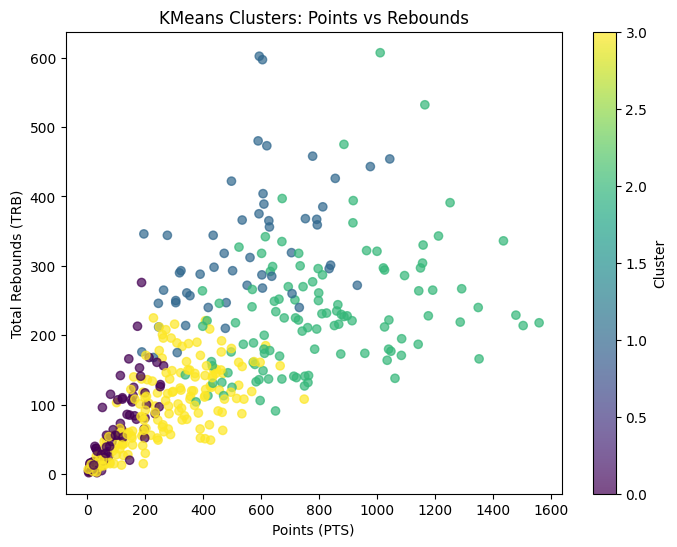

In [25]:
#View the results

# VISUALIZATION 1: POINTS vs REBOUNDS
# Purpose:
# visualize PTS and TRB because they differentiate performance tiers in the NBA.
# - Bench players should appear in bottom-left.
# - Role players should appear in the middle.
# - Stars should appear toward the upper-right.
#
# Colors represent cluster assignments from KMeans.

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    clustered_data["PTS"],        # x-axis: scoring production
    clustered_data["TRB"],        # y-axis: rebounding production
    c=clustered_data["Cluster"],  # color = cluster assignment
    alpha=0.7
)

plt.xlabel("Points (PTS)")
plt.ylabel("Total Rebounds (TRB)")
plt.title("KMeans Clusters: Points vs Rebounds")
plt.colorbar(scatter, label="Cluster")
plt.show()

- Bottom-left (low PTS, low TRB) → clearly Cluster 0 (bench)

- Middle bands → rotation / starters

- Upper-right → high production players

- Clear upward trend → better players score AND rebound more

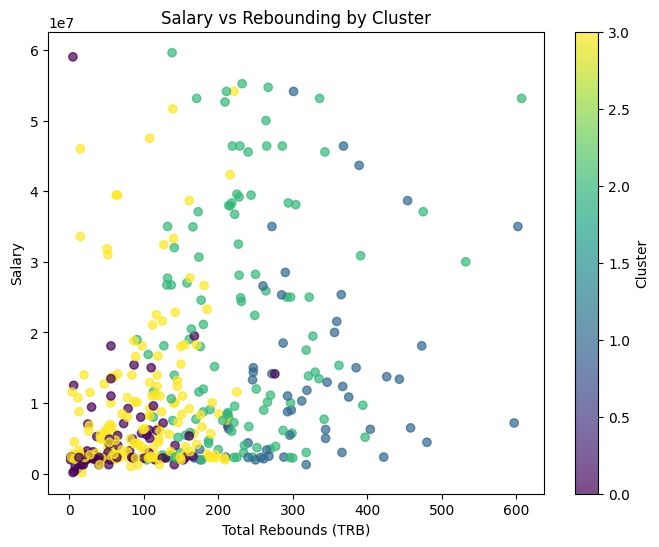

In [26]:
# VISUALIZATION 2: SALARY vs REBOUNDS
# Purpose:
# This plot helps us evaluate market efficiency.
#If salary increases proportionally with rebounding,
# the market is pricing performance well.
#
# Points far below the general trend may represent
# undervalued players ("steals").

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    clustered_data["TRB"],        # x-axis: rebounding
    clustered_data["Salary"],     # y-axis: salary
    c=clustered_data["Cluster"],  # cluster grouping
    alpha=0.7
)

plt.xlabel("Total Rebounds (TRB)")
plt.ylabel("Salary")
plt.title("Salary vs Rebounding by Cluster")
plt.colorbar(scatter, label="Cluster")
plt.show()

- Some high-TRB players earning lower salaries 

- Some low-TRB players earning high salaries

- Salary dispersion inside clusters

In [27]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores

In [28]:
# CALCULATE TOTAL VARIANCE EXPLAINED BY CLUSTERING
# KMeans minimizes within-cluster sum of squares (inertia_).
# To evaluate clustering quality, we compare:
#
#   - Total variance in the data (TSS)
#   - Variance remaining within clusters (WCSS)
#
# Formula:
# Variance Explained = 1 - (WCSS / TSS)
#
# Higher values mean clusters explain more of the structure.

# Total Sum of Squares (TSS)
# Measures total variation in the scaled dataset
tss = np.sum((X_scaled - X_scaled.mean(axis=0))**2)

# Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_

# Compute variance explained
variance_explained = 1 - (wcss / tss)

print("Total Variance Explained:", round(variance_explained, 4))
#About 52% of the total variation in player performance is captured by the 4 clusters.

Total Variance Explained: 0.5245


In [29]:
# CALCULATE SILHOUETTE SCORE
# Silhouette score measures how well-separated the clusters are.
# It ranges from -1 to 1.
#
# Closer to 1 = strong cluster separation.
# Around 0 = overlapping clusters.
# Negative = incorrect clustering.

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, labels)

print("Silhouette Score:", round(sil_score, 4))
#The clusters are meaningfully different, but there is overlap between tiers.

Silhouette Score: 0.2104


In [30]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient

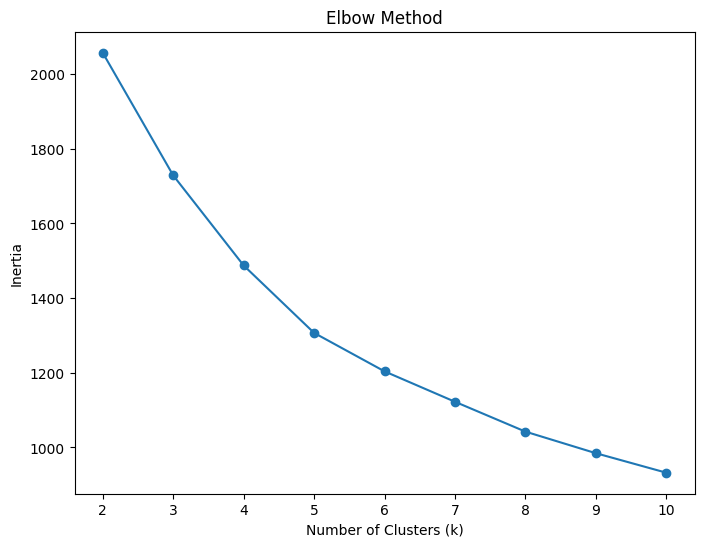

In [31]:
# ELBOW METHOD: TEST MULTIPLE VALUES OF K
#  compute inertia (within-cluster variance) for k = 2 to 10.
#  look for a "bend" in the curve where adding more clusters
# provides diminishing returns.

from sklearn.cluster import KMeans

k_values = range(2, 11)
inertias = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

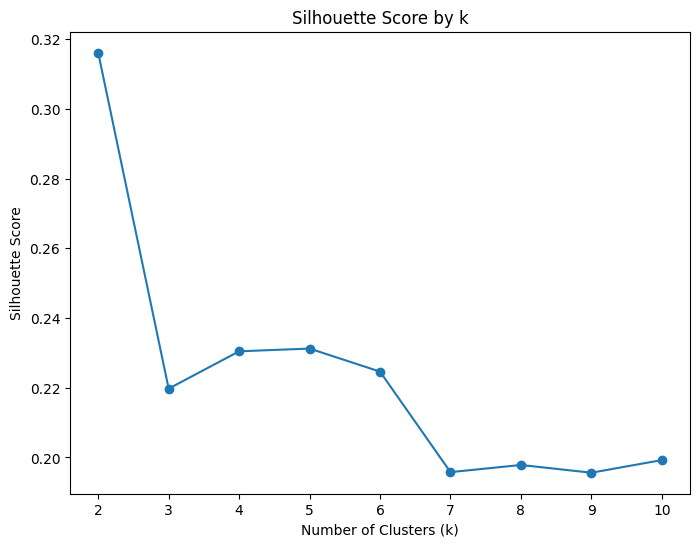

In [32]:
# SILHOUETTE SCORES FOR DIFFERENT K VALUES
#  compute silhouette scores for k = 2 to 10.
# The best k often has one of the highest silhouette scores.

from sklearn.metrics import silhouette_score

sil_scores = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = model.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels_k))

plt.figure(figsize=(8,6))
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by k")
plt.show()

From elbow plot:

- Huge drop: k = 2 → 3

- Big drop: 3 → 4

- Moderate drop: 4 → 5

- After 5 → curve flattens 

** so we can try k=5

From the silhouette score:
- k = 2 has the highest silhouette.

- After k = 2, separation decreases.

- k = 4 and k = 5 are similar (~0.23).

- After 6, clustering weakens.  

**so again we can try k=5


Although k = 2 produced the highest silhouette score, it over-simplifies player performance into only two tiers. The elbow method suggests diminishing returns after k = 5, and k = 5 produces interpretable basketball performance tiers (bench, role player, starter, star). Therefore, k = 5 is selected as the final model.

In [33]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results

In [34]:
# RETRAIN FINAL MODEL USING k = 5
# Based on elbow and silhouette analysis, we are testing k = 5
# to see if it provides better structure than k = 4.

# RETRAIN FINAL MODEL USING k = 5
# ---------------------------------------------------------
# Based on elbow and silhouette analysis, we are testing k = 5
# to see if it provides better structure than k = 4.

kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_5.fit(X_scaled)

labels_5 = kmeans_5.labels_

# Create a NEW dataframe so we don't overwrite k=4 results
clustered_data_5 = merged_data.loc[X.index].copy()
clustered_data_5["Cluster"] = labels_5

print("Number of clusters:", clustered_data_5["Cluster"].nunique())
print(clustered_data_5["Cluster"].value_counts())

Number of clusters: 5
Cluster
1    125
3     84
2     82
4     73
0     47
Name: count, dtype: int64


In [35]:
# SUMMARY STATISTICS FOR K = 5
# compute the mean of each performance feature and salary
# within each cluster to see how the 5 clusters differ.

# have to fix the salary dataset into unfiform again
clustered_data_5["Salary"] = (
    clustered_data_5["Salary"]
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)

cluster_summary_5 = (
    clustered_data_5
    .groupby("Cluster")[features + ["Salary"]]
    .mean()
    .round(2)
)

cluster_summary_5

,PTS,AST,TRB,STL,BLK,MP,eFG%,FT%,Salary
Cluster,,,,,,,,,
0,540.28,82.85,325.04,34.02,52.19,1151.34,0.61,0.69,13786054.43
1,443.94,94.06,153.97,35.74,15.13,1001.54,0.54,0.79,12054559.70
2,894.73,228.72,254.65,57.51,23.12,1551.10,0.54,0.80,23470069.13
3,127.20,32.01,45.02,10.15,3.90,326.73,0.49,0.86,7390847.96
4,118.14,28.67,73.77,12.36,8.03,347.96,0.54,0.60,4845769.33


- cluster 4: cheap bench players
- cluster 3: low minute players
- cluster 1: productive players
- cluster 0: strong starters
- cluster 2: superstars

now with k=5 we have instead of one “bench cluster,” it split into:

- Mid-salary bench (Cluster 3)

- Cheap bench (Cluster 4)

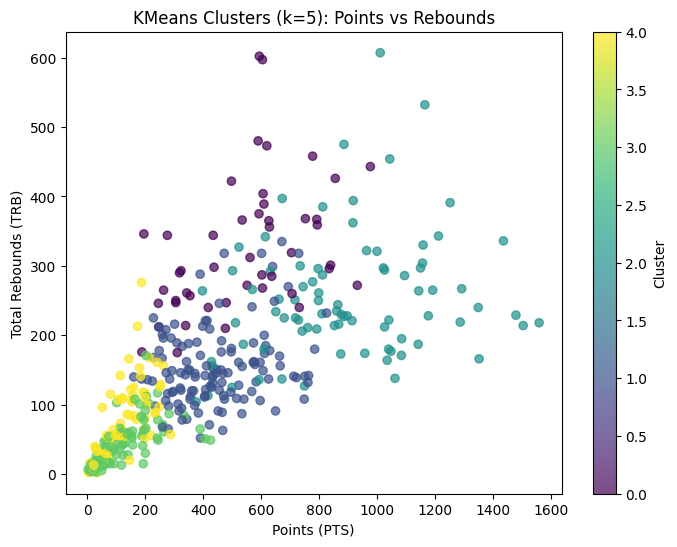

In [36]:
# Visualization 1 — Points vs Rebounds (k=5)
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    clustered_data_5["PTS"],
    clustered_data_5["TRB"],
    c=clustered_data_5["Cluster"],
    alpha=0.7
)

plt.xlabel("Points (PTS)")
plt.ylabel("Total Rebounds (TRB)")
plt.title("KMeans Clusters (k=5): Points vs Rebounds")

plt.colorbar(scatter, label="Cluster")
plt.show()

- Very low production cluster: Bottom-left corner (low PTS, low TRB)

- Slightly higher bench tier: Still low PTS but more TRB than the first group

- Mid-tier rotation players: Moderate PTS and TRB

- High production starters: Upper middle — strong PTS and TRB

- Elite scorers: Far right side — very high PTS

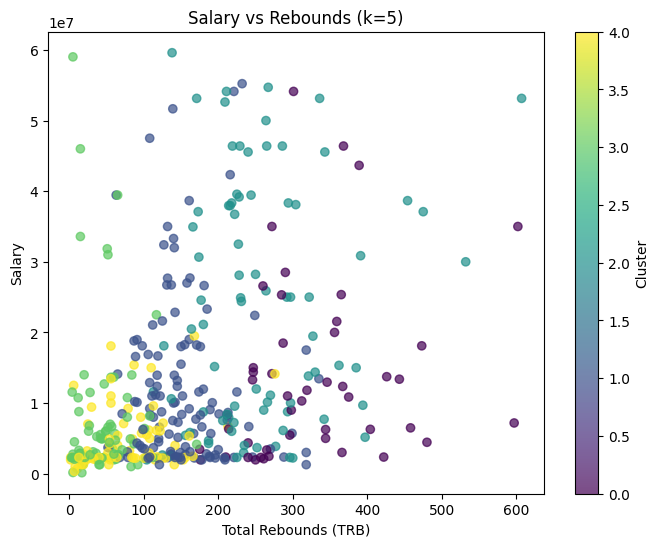

In [37]:
# Visualization 2 — Salary vs Rebounds (k=5)
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    clustered_data_5["TRB"],
    clustered_data_5["Salary"],
    c=clustered_data_5["Cluster"],
    alpha=0.7
)

plt.xlabel("Total Rebounds (TRB)")
plt.ylabel("Salary")

plt.title("Salary vs Rebounds (k=5)")

plt.colorbar(scatter, label="Cluster")
plt.show()

- A low-rebound / low-salary cluster

- A low-rebound / medium-salary cluster

- A high-production / high-salary cluster

- A high-production / underpaid cluster

- An elite superstar cluster

** there are also a lot of outliers from cluster 0 who are high TRB same level as superstars but seriously underpaid

In [38]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores

In [39]:
# VARIANCE EXPLAINED (k=5)
# Measures how much total variance is captured by clustering.

tss = np.sum((X_scaled - X_scaled.mean(axis=0))**2)
wcss_5 = kmeans_5.inertia_

variance_explained_5 = 1 - (wcss_5 / tss)

print("Variance Explained (k=5):", round(variance_explained_5, 4))

Variance Explained (k=5): 0.6025


In [40]:
# SILHOUETTE SCORE (k=5)

# Measures how well separated the clusters are.
# Range: -1 to 1 (higher is better)

from sklearn.metrics import silhouette_score

sil_5 = silhouette_score(X_scaled, labels_5)

print("Silhouette Score (k=5):", round(sil_5, 4))

Silhouette Score (k=5): 0.2312


Although k = 4 was initially selected based on interpretability, further evaluation showed that k = 5 significantly increases total variance explained (from 0.5245 to 0.6025) and improves the silhouette score (from 0.2104 to 0.2312). Therefore, k = 5 provides a better representation of the underlying structure of NBA player performance tiers and is selected as the final clustering model.

In [41]:
#Use the model to select players for Mr. Rooney to consider

In [42]:
# CALCULATE SALARY DIFFERENCE WITHIN EACH CLUSTER

# At this point, players have already been grouped into 5 clusters
# based solely on performance metrics (PTS, AST, TRB, etc.).
#
# Salary was NOT used in clustering. so I can compare salary *after* grouping players by
# similar performance levels.
#
# goal: Determine whether each player is overpaid or underpaid relative to other players with similar performance.
#
# Step 1:
# Compute the average salary inside each performance cluster.
# This gives us a "market rate" for each performance tier.


#The groupby("Cluster") function splits the dataset into
# 5 separate groups based on performance tier.
# ["Salary"] selects the Salary column within each group.
# transform("mean") computes the average salary inside each cluster
# and then assigns that average value BACK to every player
# within that same cluster.
clustered_data_5["Cluster_Avg_Salary"] = (
    clustered_data_5.groupby("Cluster")["Salary"].transform("mean")
)

# Now measure how far each player's salary deviates from the average salary of players in their cluster.
#
# This calculation is done row-by-row: Salary_Diff = Player Salary - Cluster Average Salary
#
# Interpretation:
#   Negative value  → Player is UNDERPAID relative to peers
#   Positive value  → Player is OVERPAID relative to peers
#   Near zero       → Salary aligns with performance tier
#
# This allows evaluating salary efficiency
# without comparing bench players to superstars.

clustered_data_5["Salary_Diff"] = (
    clustered_data_5["Salary"] - clustered_data_5["Cluster_Avg_Salary"]
)

In [47]:
# Overpaid low-tier players

# focus on players in lower performance clusters (3 and 4).
# The .isin([3,4]) condition selects players who belong to these lower production tiers.

# Salary_Diff > 0 selects players who are earning MORE
# than the average salary for their cluster.

# Combined, this identifies players who:
#   - Have lower statistical production
#   - Are being paid above their performance tier
#
# These contracts may represent financial inefficiency.
not_good = clustered_data_5[
    (clustered_data_5["Cluster"].isin([3,4])) &
    (clustered_data_5["Salary_Diff"] > 0)
].sort_values("Salary_Diff", ascending=False)

not_good.head(5)

,Player,Salary,Age,Pos,G,GS,MP,FG%,3P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,Cluster,Cluster_Avg_Salary,Salary_Diff
511,Bradley Beal,59020270.0,32.0,SG,6.0,6.0,121.0,0.375,0.368,0.448,0.750,5.0,10.0,3.0,0.0,49.0,3,7.390848e+06,5.162942e+07
493,Trae Young,45999660.0,27.0,PG,10.0,10.0,280.0,0.415,0.305,0.481,0.863,15.0,89.0,10.0,1.0,193.0,3,7.390848e+06,3.860881e+07
485,Ja Morant,39446090.0,26.0,PG,20.0,20.0,569.0,0.410,0.235,0.441,0.897,65.0,161.0,20.0,6.0,389.0,3,7.390848e+06,3.205524e+07
464,Jalen Green,33584499.0,23.0,SG,7.0,2.0,107.0,0.409,0.351,0.508,0.846,15.0,16.0,3.0,0.0,78.0,3,7.390848e+06,2.619365e+07
457,Jordan Poole,31848215.0,26.0,PG,28.0,6.0,710.0,0.370,0.336,0.475,0.876,51.0,86.0,19.0,9.0,406.0,3,7.390848e+06,2.445737e+07


In [ ]:
# Underpaid high-tier players

# now look at higher performance clusters (0, 1, 2).

# Salary_Diff < 0 selects players earning LESS than
# the average salary within their performance tier.
#
# These players:
#   - Perform at a high statistical level
#   - Are paid below the market rate for similar players
#
# These represent potential value opportunities.
good_choices = clustered_data_5[
    (clustered_data_5["Cluster"].isin([0,1,2])) &
    (clustered_data_5["Salary_Diff"] < 0)
].sort_values("Salary_Diff")

good_choices.head(5)

,Player,Salary,Age,Pos,G,GS,MP,FG%,3P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,Cluster,Cluster_Avg_Salary,Salary_Diff
35,Jamal Shead,1955377.0,23.0,PG,55.0,7.0,1225.0,0.363,0.321,0.450,0.759,104.0,297.0,54.0,9.0,375.0,2,2.347007e+07,-2.151469e+07
65,Toumani Camara,2221677.0,25.0,PF,56.0,56.0,1873.0,0.441,0.370,0.564,0.702,300.0,144.0,56.0,25.0,734.0,2,2.347007e+07,-2.124839e+07
96,Russell Westbrook,2296274.0,37.0,SF,52.0,46.0,1521.0,0.430,0.345,0.509,0.697,296.0,342.0,68.0,8.0,796.0,2,2.347007e+07,-2.117380e+07
90,Collin Gillespie,2296274.0,26.0,PG,54.0,35.0,1527.0,0.434,0.423,0.576,0.846,225.0,253.0,75.0,12.0,718.0,2,2.347007e+07,-2.117380e+07
126,Cam Spencer,2537989.0,25.0,SG,51.0,14.0,1229.0,0.477,0.447,0.612,0.931,136.0,287.0,36.0,5.0,592.0,2,2.347007e+07,-2.093208e+07


In [48]:
# IDENTIFY BACKUP VALUE OPTIONS
# Cluster 1 represents solid rotational players.
#
# We filter for players in this cluster
# who are earning less than their cluster average.
#
# These players may not be stars,
# but provide cost-effective depth.

backup_choices = clustered_data_5[
    (clustered_data_5["Cluster"] == 1) &
    (clustered_data_5["Salary_Diff"] < 0)
].sort_values("Salary_Diff")

backup_choices.head(5)

,Player,Salary,Age,Pos,G,GS,MP,FG%,3P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,Cluster,Cluster_Avg_Salary,Salary_Diff
17,Maxime Raynaud,1272870.0,22.0,C,48.0,30.0,1127.0,0.552,0.268,0.568,0.753,318.0,49.0,24.0,23.0,472.0,1,1.205456e+07,-1.078169e+07
12,Will Richard,1272870.0,23.0,SG,49.0,15.0,937.0,0.470,0.351,0.579,0.822,121.0,67.0,57.0,5.0,323.0,1,1.205456e+07,-1.078169e+07
31,Jaylen Wells,1955377.0,22.0,SG,52.0,52.0,1394.0,0.415,0.338,0.502,0.765,178.0,86.0,41.0,6.0,629.0,1,1.205456e+07,-1.009918e+07
20,Pelle Larsson,1955377.0,24.0,SG,45.0,32.0,1077.0,0.495,0.333,0.559,0.767,150.0,148.0,29.0,10.0,461.0,1,1.205456e+07,-1.009918e+07
28,Quinten Post,1955377.0,25.0,PF,55.0,32.0,936.0,0.439,0.350,0.553,0.813,209.0,75.0,23.0,26.0,422.0,1,1.205456e+07,-1.009918e+07


In [49]:
#Write up the results in a separate notebook with supporting visualizations and 
# an overview of how and why you made the choices you did. This should be at least 
# 500 words and should be written for a non-technical audience.